In [1]:
import pandas as pd

# Load processed price data
tsla_prices = pd.read_csv('../data/processed/tsla_processed.csv', index_col=0, parse_dates=True)['Close']
bnd_prices = pd.read_csv('../data/processed/bnd_processed.csv', index_col=0, parse_dates=True)['Close']
spy_prices = pd.read_csv('../data/processed/spy_processed.csv', index_col=0, parse_dates=True)['Close']

# Define backtesting window (adjust dates to your data)
start_date = '2024-08-01'
end_date = '2025-07-31'

# Filter prices to backtesting period
tsla_bt = tsla_prices.loc[start_date:end_date]
bnd_bt = bnd_prices.loc[start_date:end_date]
spy_bt = spy_prices.loc[start_date:end_date]

# Combine into one DataFrame
prices_bt = pd.concat([tsla_bt, bnd_bt, spy_bt], axis=1)
prices_bt.columns = ['TSLA', 'BND', 'SPY']


In [2]:
import numpy as np

returns_bt = np.log(prices_bt / prices_bt.shift(1)).dropna()


In [3]:
# Example from Task 4 results (adjust if different)
strategy_weights = {'TSLA': 0.00, 'BND': 0.5534, 'SPY': 0.4466}

# Benchmark portfolio weights
benchmark_weights = {'TSLA': 0.0, 'BND': 0.4, 'SPY': 0.6}


In [4]:
strategy_returns = (returns_bt * pd.Series(strategy_weights)).sum(axis=1)
benchmark_returns = (returns_bt * pd.Series(benchmark_weights)).sum(axis=1)

# Cumulative returns starting at 1.0 (initial investment)
strategy_cum_returns = (strategy_returns + 1).cumprod()
benchmark_cum_returns = (benchmark_returns + 1).cumprod()


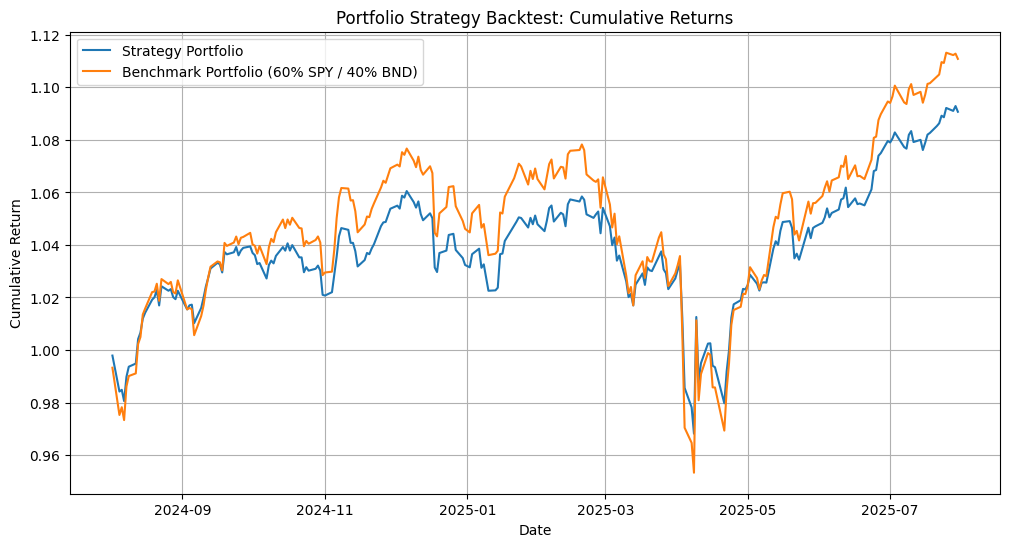

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(strategy_cum_returns, label='Strategy Portfolio')
plt.plot(benchmark_cum_returns, label='Benchmark Portfolio (60% SPY / 40% BND)')
plt.title('Portfolio Strategy Backtest: Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid(True)
plt.show()


In [6]:
trading_days = 252

def annualized_sharpe(returns, risk_free_rate=0):
    excess_returns = returns - risk_free_rate / trading_days
    return np.sqrt(trading_days) * excess_returns.mean() / excess_returns.std()

strategy_sharpe = annualized_sharpe(strategy_returns)
benchmark_sharpe = annualized_sharpe(benchmark_returns)

strategy_total_return = strategy_cum_returns[-1] - 1
benchmark_total_return = benchmark_cum_returns[-1] - 1

print(f"Strategy Portfolio Total Return: {strategy_total_return:.2%}")
print(f"Strategy Portfolio Annualized Sharpe Ratio: {strategy_sharpe:.2f}\n")

print(f"Benchmark Portfolio Total Return: {benchmark_total_return:.2%}")
print(f"Benchmark Portfolio Annualized Sharpe Ratio: {benchmark_sharpe:.2f}")


Strategy Portfolio Total Return: 9.07%
Strategy Portfolio Annualized Sharpe Ratio: 0.97

Benchmark Portfolio Total Return: 11.08%
Benchmark Portfolio Annualized Sharpe Ratio: 0.93


C:\Users\dagi\AppData\Local\Temp\ipykernel_17088\1452145543.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  strategy_total_return = strategy_cum_returns[-1] - 1
C:\Users\dagi\AppData\Local\Temp\ipykernel_17088\1452145543.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  benchmark_total_return = benchmark_cum_returns[-1] - 1
